In [1]:
# Data Management and Math
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model Saving and Loading
import joblib

In [2]:
# Load the dataset
df = pd.read_csv('data.csv')

# Display first few rows
print(df.head())


   age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak slope ca  \
0   28    1   2      130  132   0       2     185     0      0.0     ?  ?   
1   29    1   2      120  243   0       0     160     0      0.0     ?  ?   
2   29    1   2      140    ?   0       0     170     0      0.0     ?  ?   
3   30    0   1      170  237   0       1     170     0      0.0     ?  ?   
4   31    0   2      100  219   0       1     150     0      0.0     ?  ?   

  thal  num         
0    ?           0  
1    ?           0  
2    ?           0  
3    6           0  
4    ?           0  


In [3]:
# Strip column names
df.columns = df.columns.str.strip()

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Convert specific columns to numeric
numeric_cols = ['trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca', 'thal', 'num']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Descriptive statistics
print(df.describe())
print(f"Number of samples: {df.shape[0]}")


              age         sex          cp    trestbps        chol     thalach  \
count  294.000000  294.000000  294.000000  293.000000  271.000000  293.000000   
mean    47.826531    0.724490    2.982993  132.583618  250.848708  139.129693   
std      7.811812    0.447533    0.965117   17.626568   67.657711   23.589749   
min     28.000000    0.000000    1.000000   92.000000   85.000000   82.000000   
25%     42.000000    0.000000    2.000000  120.000000  209.000000  122.000000   
50%     49.000000    1.000000    3.000000  130.000000  243.000000  140.000000   
75%     54.000000    1.000000    4.000000  140.000000  282.500000  155.000000   
max     66.000000    1.000000    4.000000  200.000000  603.000000  190.000000   

          oldpeak       slope   ca       thal         num  
count  294.000000  104.000000  3.0  28.000000  294.000000  
mean     0.586054    1.894231  0.0   5.642857    0.360544  
std      0.908648    0.338995  0.0   1.615074    0.480977  
min      0.000000    1.000000 

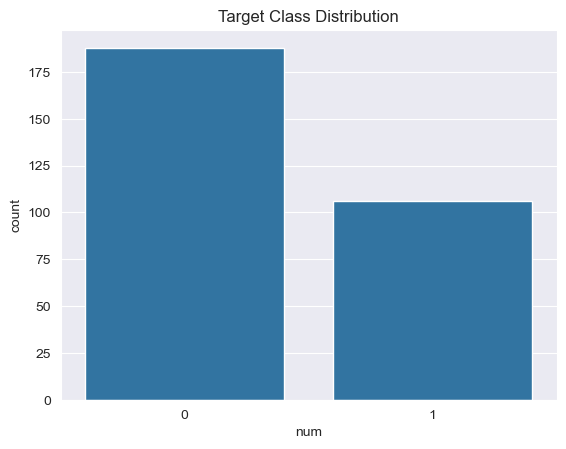

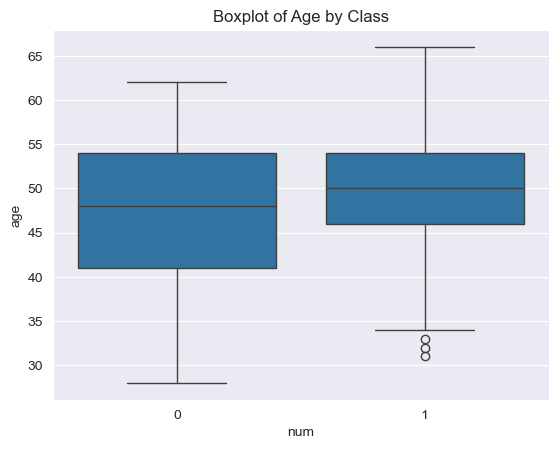

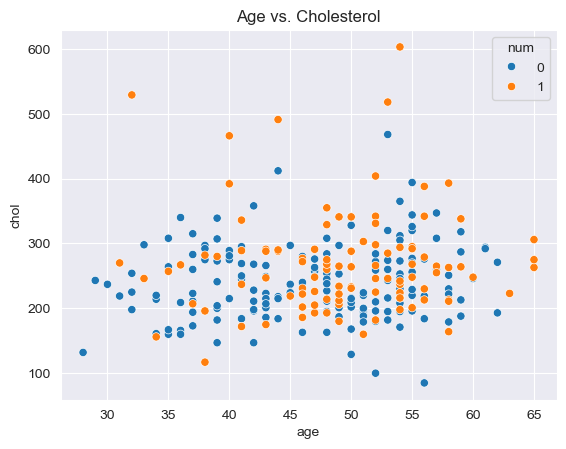

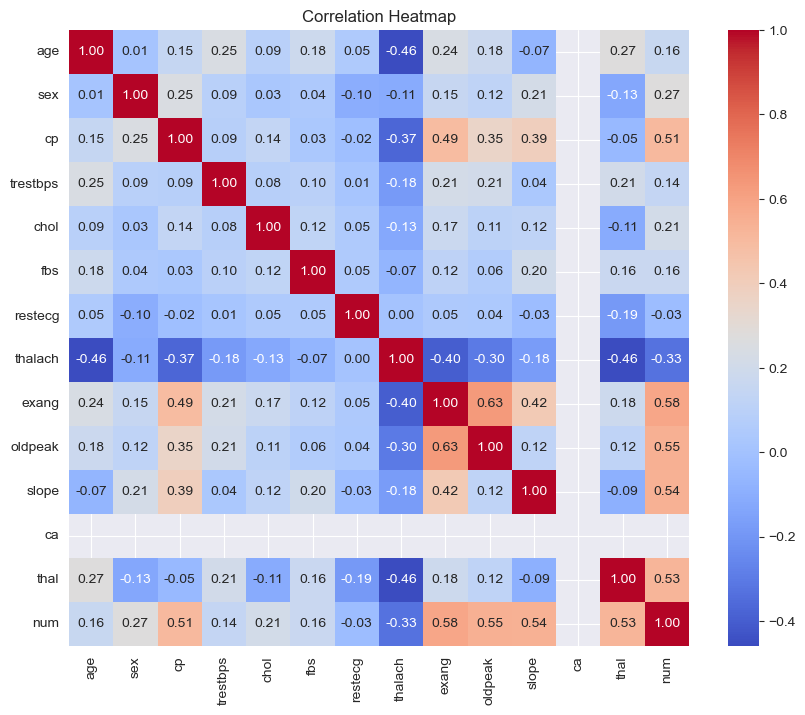

In [8]:
# Class distribution
sns.countplot(x='num', data=df)
plt.title("Target Class Distribution")
plt.show()

# Boxplot and scatter plot (e.g., age vs. chol)
sns.boxplot(x='num', y='age', data=df)
plt.title("Boxplot of Age by Class")
plt.show()

sns.scatterplot(x='age', y='chol', hue='num', data=df)
plt.title("Age vs. Cholesterol")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


In [9]:
# Handling missing values
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

for col in ['fbs', 'restecg', 'exang']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Convert target to binary
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Features and target separation
X = df.drop('num', axis=1)
y = df['num']

# Standardization using Z-score
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Show standardized data
print(pd.DataFrame(X_scaled, columns=X.columns).head())


        age       sex        cp  trestbps      chol       fbs   restecg  \
0 -2.542347  0.616670 -1.020259 -0.146571 -1.822595 -0.270172  3.879035   
1 -2.414117  0.616670 -1.020259 -0.715815 -0.111523 -0.270172 -0.473775   
2 -2.414117  0.616670 -1.020259  0.422673 -0.111523 -0.270172 -0.473775   
3 -2.285888 -1.621613 -2.058170  2.130406 -0.204014 -0.270172  1.702630   
4 -2.157658 -1.621613 -1.020259 -1.854303 -0.481485 -0.270172  1.702630   

    thalach     exang   oldpeak     slope   ca      thal  
0  1.951019 -0.658898 -0.646074  0.180814  0.0  0.067953  
1  0.887616 -0.658898 -0.646074  0.180814  0.0  0.067953  
2  1.312977 -0.658898 -0.646074  0.180814  0.0  0.067953  
3  1.312977 -0.658898 -0.646074  0.180814  0.0  0.067953  
4  0.462255 -0.658898 -0.646074  0.180814  0.0  0.067953  


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [15]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[33  5]
 [ 4 17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88        38
           1       0.77      0.81      0.79        21

    accuracy                           0.85        59
   macro avg       0.83      0.84      0.84        59
weighted avg       0.85      0.85      0.85        59


Accuracy Score: 0.847457627118644


In [17]:
joblib.dump(model, 'diabetes_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [19]:
# Load model and scaler
import warnings
warnings.filterwarnings('ignore')
loaded_model = joblib.load('diabetes_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

# Define new unseen data (example)
new_data = np.array([[63, 1, 145, 233, 1, 2.3, 3, 0, 1, 0, 2, 1, 1]])  # shape = (1, 13)

# Standardize
new_data_scaled = loaded_scaler.transform(new_data)

# Prediction
prediction = loaded_model.predict(new_data_scaled)
print("Prediction (0 = No Disease, 1 = Disease):", prediction[0])


Prediction (0 = No Disease, 1 = Disease): 1
